In [1]:
# code to perform logistic regression

train accuracy: 67.23300970873785 %
Validation accuracy: 76.81159420289855 %
Test accuracy: 76.812


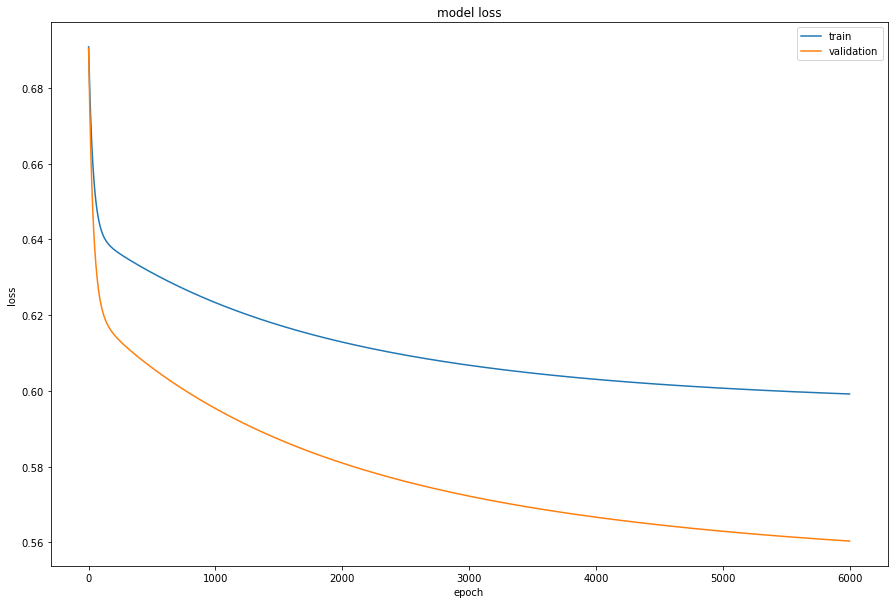

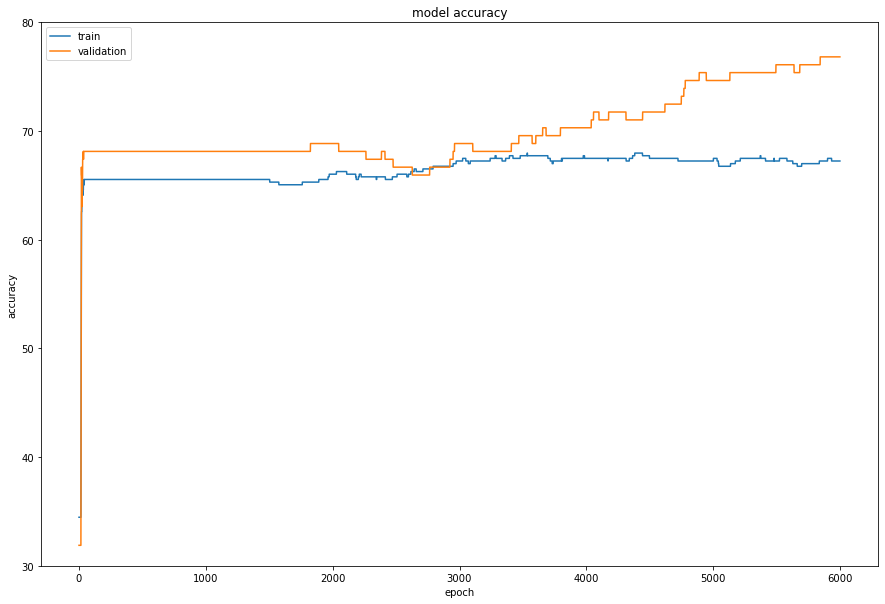

In [2]:
#!/usr/bin/env python
# coding: utf-8


# importing necessary libraries for data preprocessing and plotting graphs
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

# collective_data is the complete data read from diabetes.csv file
collective_data = pd.read_csv("diabetes.csv")
correlation_matrix = collective_data.corr()


# df_sub=collective_data.copy()
# iqr = df_sub.quantile(0.75, numeric_only=False) - df_sub.quantile(0.25, numeric_only=False)
# lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
# df = df_sub[lim]
#df_sub[lim].boxplot(column=list(df_sub[lim].columns))



# removing outliers from the dataset
z_scores = zscore(collective_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = collective_data[filtered_entries]




input_data = df.drop(columns=['Outcome'])   #input_data

output_data = df['Outcome']   #output_data




# Splitting the data into train,test and validations sets
x_train_temp, x_test, y_train_temp, y_test = train_test_split(input_data,output_data,test_size = 0.2,random_state = 10)


x_train, x_val, y_train, y_val = train_test_split(x_train_temp,y_train_temp,test_size = 0.25,random_state = 10)




# Reshaping training Set and coverting to numpy array
X = x_train.T
X = X.to_numpy()
Y_train = y_train.values.reshape(1,y_train.shape[0])
X_train=scaler.fit_transform(X)   # scaling data 




# Reshaping Validation Set and coverting to numpy array

X_v = x_val.T
X_v = X_v.to_numpy()
Y_val = y_val.values.reshape(1,y_val.shape[0])
X_val=scaler.fit_transform(X_v)   # scaling data 




# Reshaping Test Set and coverting to numpy array
X_t = x_test.T
X_t = X_t.to_numpy()
Y_test = y_test.values.reshape(1,y_test.shape[0])
X_test=scaler.fit_transform(X_t)   # scaling data 




#defining sigmoid function
def sigmoid(z):

    g = 1/(1 + np.exp(-z))
    return g



#initialize weights
def set_wb(d):
    b = 0.2
    w = np.random.randn(d,1)*0.01
    return w,b



# def norm(X):
#     for i in range(X.shape[1]):
#         X = (X - X.mean(axis=0))/X.std(axis=0)
#         return X



# Primary function for building the model
def learn_model(X,Y,X_val,Y_val,w,b,learning_rate,epochs):
    loss = []
    #X = norm(X1)
    m = X.shape[1]
    accuracy = []
    val_acc = []
    for epoch in range(epochs):
        z = np.dot(w.T,X + b) 
        s = sigmoid(z)
       # reg_term = (lambda_val/(2*m)) * np.sum(np.square(w))
        cost = -np.sum(np.multiply(np.log(s),Y) + np.multiply((1 - Y),np.log(1 - s)))/m  
        loss.append(np.squeeze(cost))
        dz = s - Y
        dw = (1/m)*np.dot(X,dz.T) 
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        y_prediction_temp = predict(w,b,X)
        acc = (100 - np.mean(np.abs(y_prediction_temp - Y)) * 100)
        accuracy.append(acc)
        
        y_prediction_1 = predict(w,b,X_val)
        acc1 = (100 - np.mean(np.abs(y_prediction_1 - Y_val)) * 100)
        val_acc.append(acc1)
    y = predict(w,b,X)
    return y,w,b,loss,accuracy,val_acc

# function to calculate validation loss
def learn_model_val(X,Y,w,b,learning_rate,epochs):
    loss = []
    #X = norm(X1)
    m = X.shape[1]
    for epoch in range(epochs):
        z = np.dot(w.T,X + b) 
        s = sigmoid(z)
       # reg_term = (lambda_val/(2*m)) * np.sum(np.square(w))
        cost = -np.sum(np.multiply(np.log(s),Y) + np.multiply((1 - Y),np.log(1 - s)))/m  
        loss.append(np.squeeze(cost))
        dz = s - Y
        dw = (1/m)*np.dot(X,dz.T) 
        db = (1/m)*np.sum(dz)
        w = w - learning_rate*dw
        b = b - learning_rate*db
       
    y = predict(w,b,X)
    return y,w,b,loss


# For prediction
def predict(w,b,x):
    y = sigmoid(np.dot(w.T,x) + b)
    y_prediction = np.zeros([1,x.shape[1]])
    for j in range(y.shape[1]):
        if y[0,j] <= 0.5:
            y_prediction[0,j] = 0
        else:
            y_prediction[0,j] = 1
    return y_prediction



# main function
def logistic():
    number_features = X.shape[0]
    learning_rate = 0.01
    epochs = 6000
    w,b = set_wb(number_features)
    y_pred_train,w_pred,b_pred,train_loss,train_accuracy,val_accuracy = learn_model(X_train,Y_train,X_val,Y_val,w,b,learning_rate,epochs)
    y_pred_val_temp,w_temp,b_temp,val_loss = learn_model_val(X_val,Y_val,w,b,learning_rate,epochs)
    y_pred_val = predict(w_pred,b_pred,X_val)
    y_pred_test = predict(w_pred,b_pred,X_test)

   
    #print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - Y_train)) * 100))
    #print("Validation accuracy: {} %".format(100 - np.mean(np.abs(y_pred_val - Y_val)) * 100))
    print("Test accuracy: {}".format(round(100 - np.mean(np.abs(y_pred_test - Y_test)) * 100,3)))

   
    #code to plot graph between train and validation loss
    plt.figure(figsize=(15, 10))
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    
    #code to plot graph between train and validation accuracy
    plt.figure(figsize=(15, 10))
    plt.plot(train_accuracy)
    plt.plot(val_accuracy)
    plt.ylim([30,80])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')  


logistic()







In [3]:
# code for Neural Networks

Learning Model with L1 Regularization
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
--------------------------------------------------------------------------------------------------------
5/5 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7662


 Loss 0.5477704405784607 Test Accuracy: 76.62


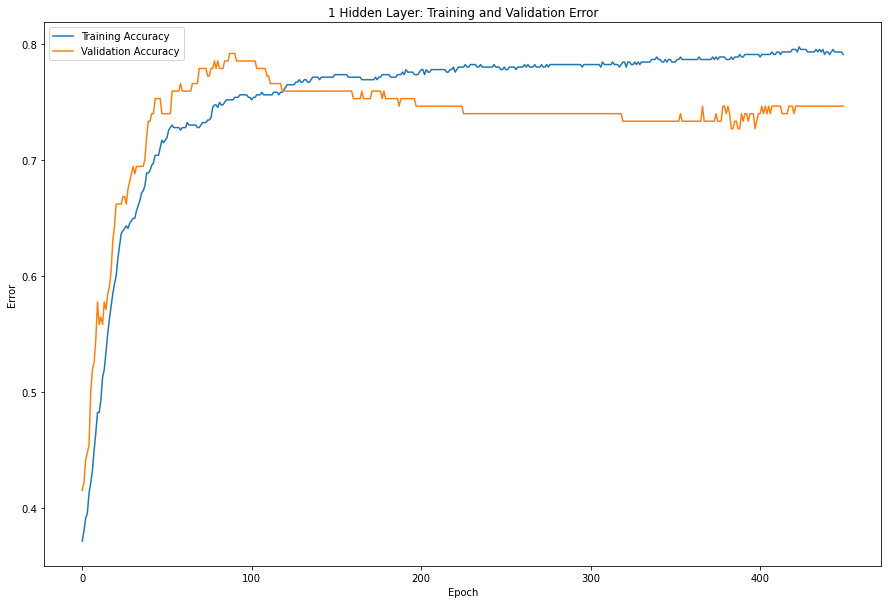

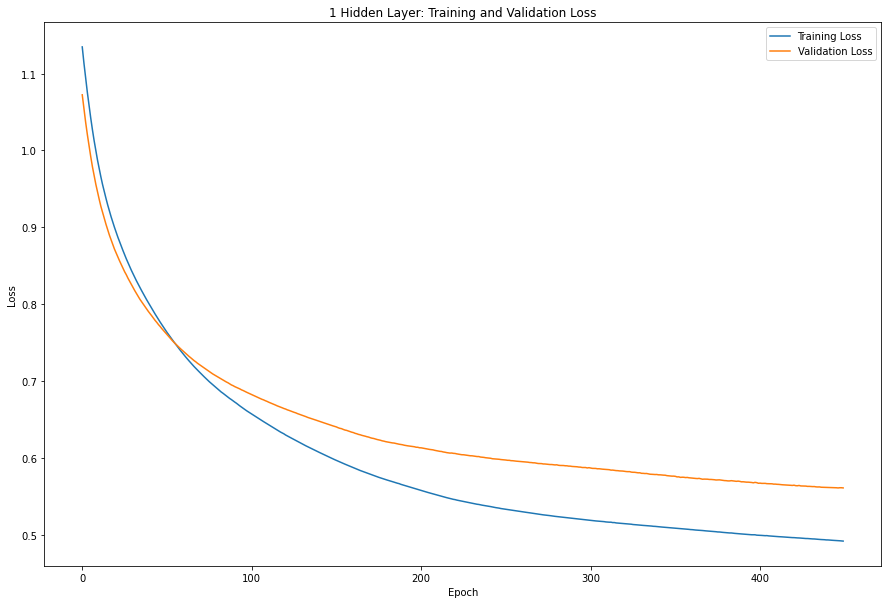

Learning Model with L2 Regularization
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
--------------------------------------------------------------------------------------------------------
5/5 [==============================] - 0s 4ms/step - loss: 0.5103 - accuracy: 0.7338


 Loss 0.5103291273117065 Test Accuracy: 73.38


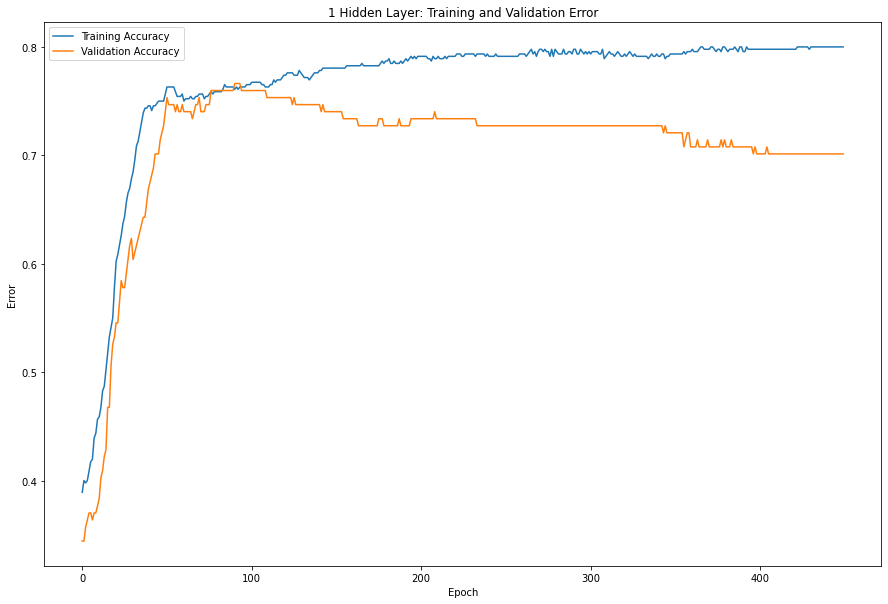

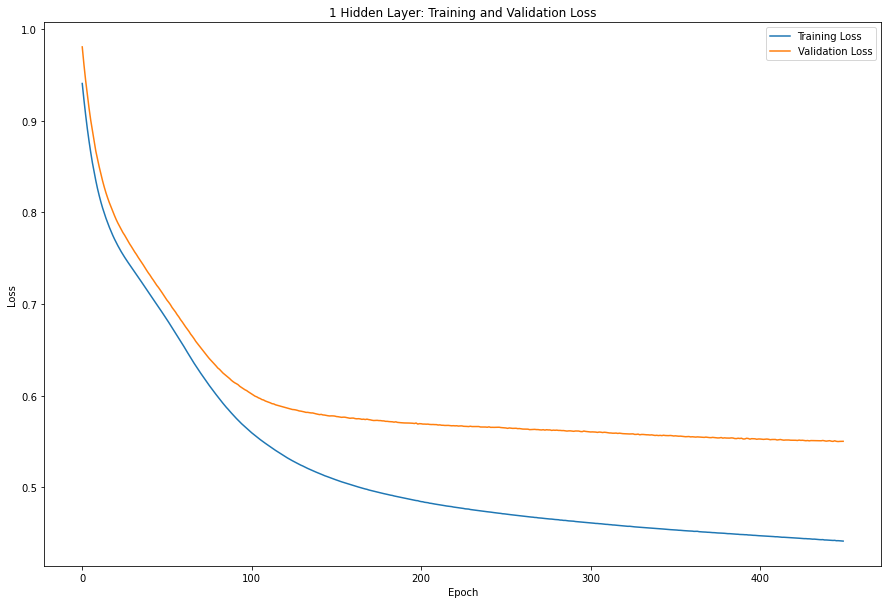

Learning Model with Dropout
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
-----------------------------------------------------------------------------------------

In [4]:
#!/usr/bin/env python
# coding: utf-8




# importing required libraries
from numpy import loadtxt
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from scipy.stats import zscore
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

scale = StandardScaler()





# importing data and splitting the data into input and output data
data = pd.read_csv("diabetes.csv")





input_data = data.drop(columns=['Outcome'])   #input_data

output_data = data['Outcome']   #output_data





# Splitting the data into train,test and validations sets
x_train_temp, x_test, y_train_temp, y_test = train_test_split(input_data,output_data,test_size = 0.2,random_state = 8)


x_train, x_val, y_train, y_val = train_test_split(x_train_temp,y_train_temp,test_size = 0.25,random_state = 8)





# Converting to numpy
X = x_train.to_numpy()
Y_train = y_train.to_numpy()
# scaling data
X_train=scale.fit_transform(X) 





# Converting to numpy
X_v = x_val.to_numpy()
Y_val = y_val.to_numpy()
# scaling data
X_val=scale.fit_transform(X_v)   





# Converting to numpy
X_t = x_test.to_numpy()
Y_test = y_test.to_numpy()
# scaling data 
X_test=scale.fit_transform(X_t)





# model for training the data with L1 Regularization
def model_train1(type = 'L1'):
    model = Sequential()
    print("Learning Model with L1 Regularization")
    # Defining layers with one hidden layer, one input and an output layer
    model.add(Dense(12, input_dim=8, activation='relu',kernel_regularizer=keras.regularizers.l1()))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) # specification of model parameters
    print(model.summary())
    
    
    history = model.fit(X_train, Y_train, epochs=450, batch_size=10,validation_data=(X_val,Y_val),verbose = 0) # Fitting the data

    print("--------------------------------------------------------------------------------------------------------")

    
    # Evaluating the accuracy and loss using the test data
    loss, accuracy = model.evaluate(X_test, Y_test)
    print('\n\n Loss', loss,'Test Accuracy: %.2f' % (accuracy*100))
    
    # Plot the accuracy and loss.

    # Accuracy
    plt.figure(figsize=(15, 10))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('1 Hidden Layer: Training and Validation Error')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
    plt.show()

    # Loss
    plt.figure(figsize=(15, 10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('1 Hidden Layer: Training and Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
    plt.show()





model_train1(type = 'L1')





# model for training the data with L2 Regularization
def model_train2():
    model2 = Sequential()
    print("Learning Model with L2 Regularization")
    # Defining layers with one hidden layer, one input and an output layer
    model2.add(Dense(12, input_dim=8, activation='relu',kernel_regularizer=keras.regularizers.l2()))
    model2.add(Dense(8, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))


    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) # specification of model parameters
    print(model2.summary())
    
    history = model2.fit(X_train, Y_train, epochs=450, batch_size=10,validation_data=(X_val,Y_val),verbose=0) # Fitting the data

    print("--------------------------------------------------------------------------------------------------------")

    
    # Evaluating the accuracy and loss using the test data
    loss, accuracy = model2.evaluate(X_test, Y_test)
    print('\n\n Loss', loss,'Test Accuracy: %.2f' % (accuracy*100))
    
    # Plot the accuracy and loss.

    # Accuracy
    plt.figure(figsize=(15, 10))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('1 Hidden Layer: Training and Validation Error')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
    plt.show()

    # Loss
    plt.figure(figsize=(15, 10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('1 Hidden Layer: Training and Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
    plt.show()





model_train2()




# model for training the data with dropout
def model_train_dropout():
    model1 = Sequential()
    print("Learning Model with Dropout")
    model1.add(Dense(12, input_dim=8, activation='relu'))
    model1.add(Dropout(0.1))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dropout(0.1))
    model1.add(Dense(1, activation='sigmoid'))


    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) # specification of model parameters
    print(model1.summary())
    
    
    history = model1.fit(X_train, Y_train, epochs=450, batch_size=10,validation_data=(X_val,Y_val),verbose = 0) # fitting the data

    print("--------------------------------------------------------------------------------------------------------")



    loss1, accuracy1 = model1.evaluate(X_test, Y_test)
    print('\n\n Loss', loss1,'Test Accuracy: %.2f' % (accuracy1*100))
    
    



model_train_dropout()

